In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def load_data(filename:str):
    return pd.read_csv(filename+".csv")
dataset = load_data("V7")

In [39]:
dataset.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [40]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [41]:
dataset['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

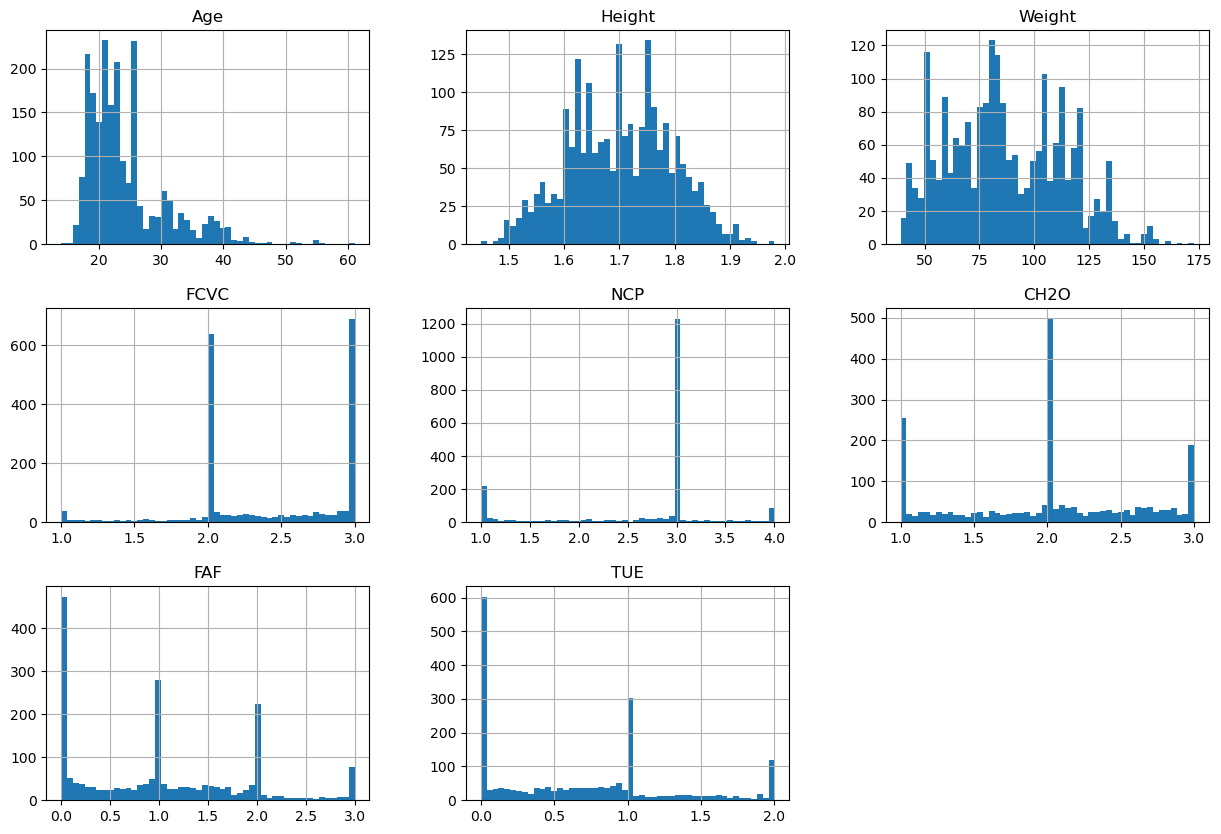

In [42]:
# Гистограммы для числовых признаков
dataset.hist(bins=50,figsize=(15, 10))
plt.show()

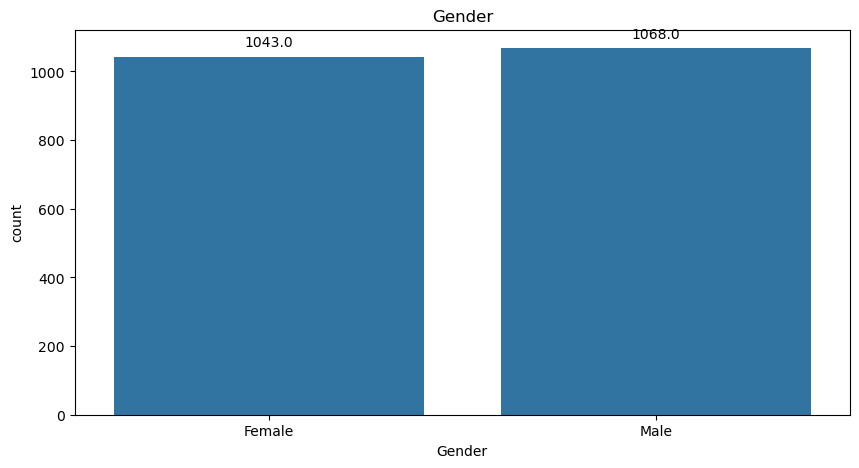

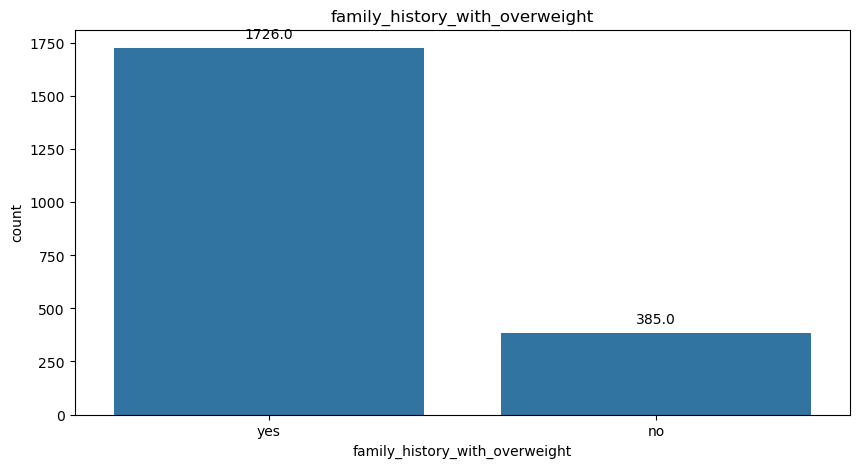

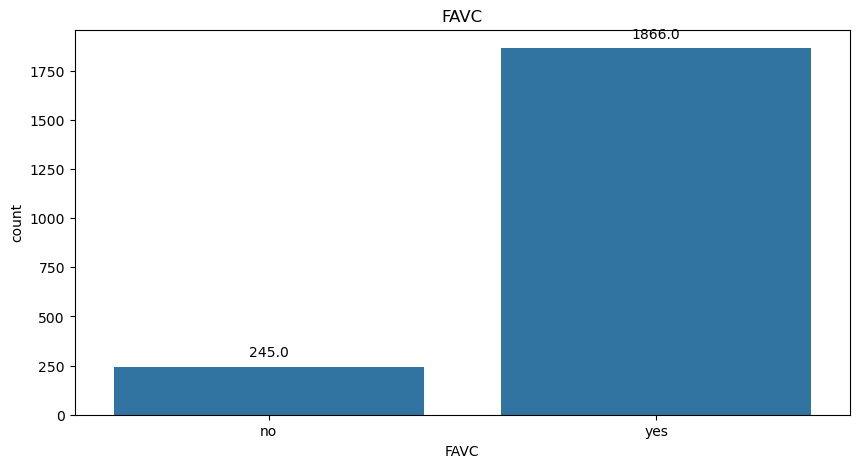

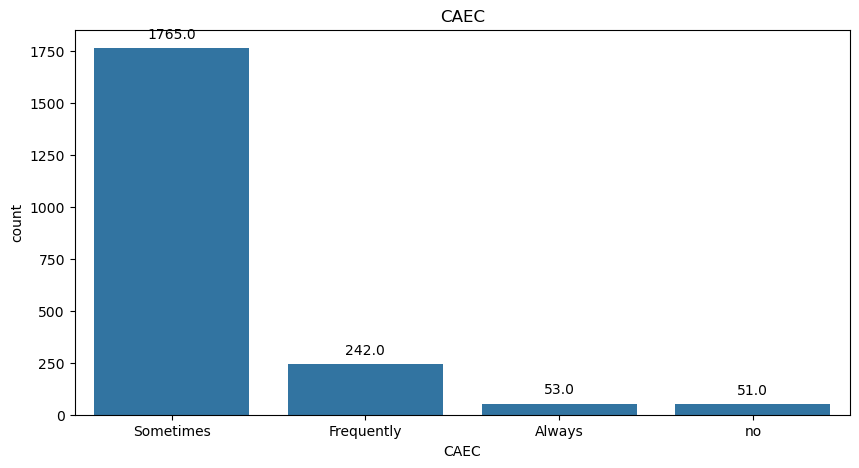

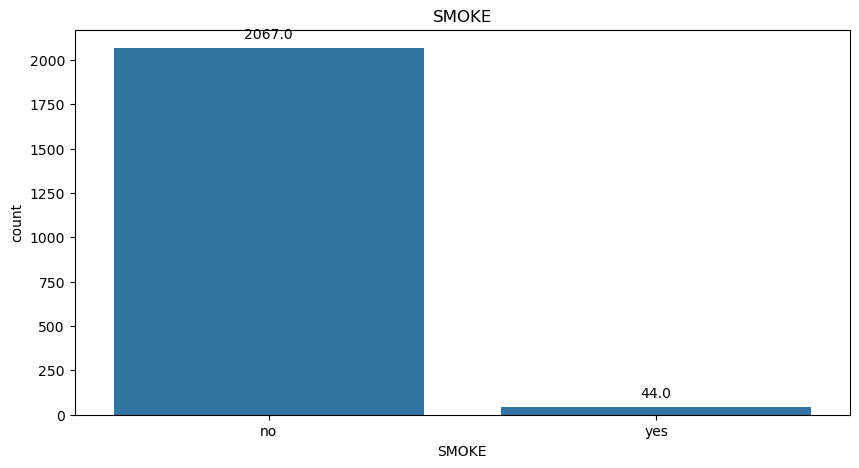

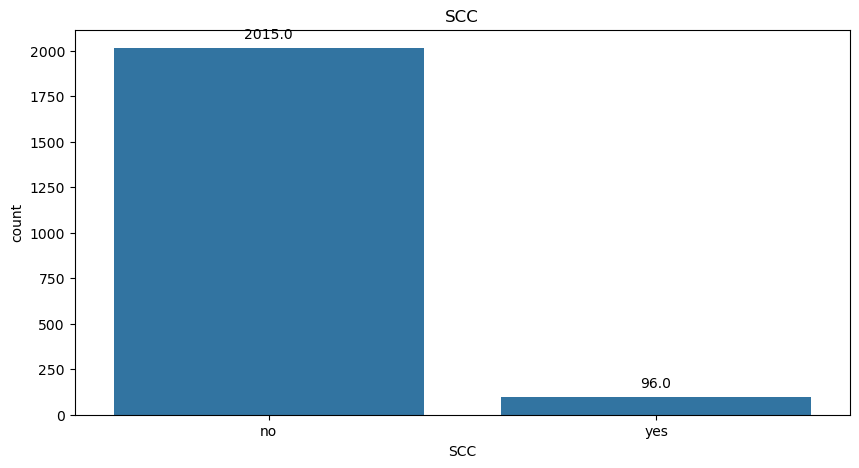

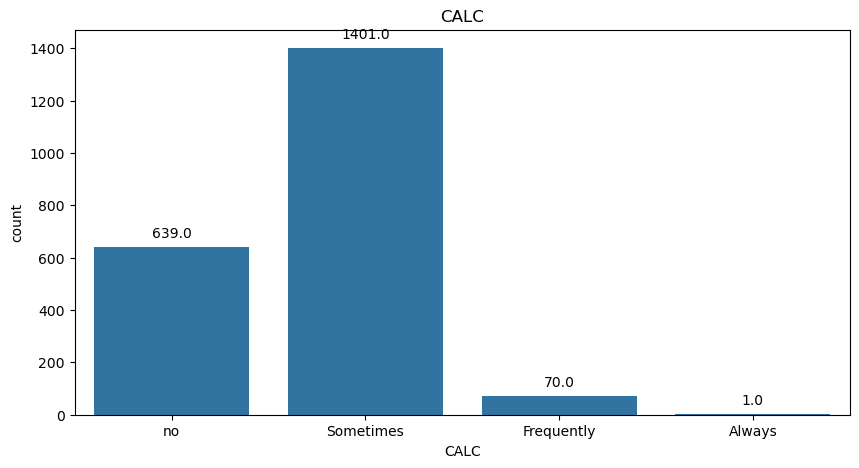

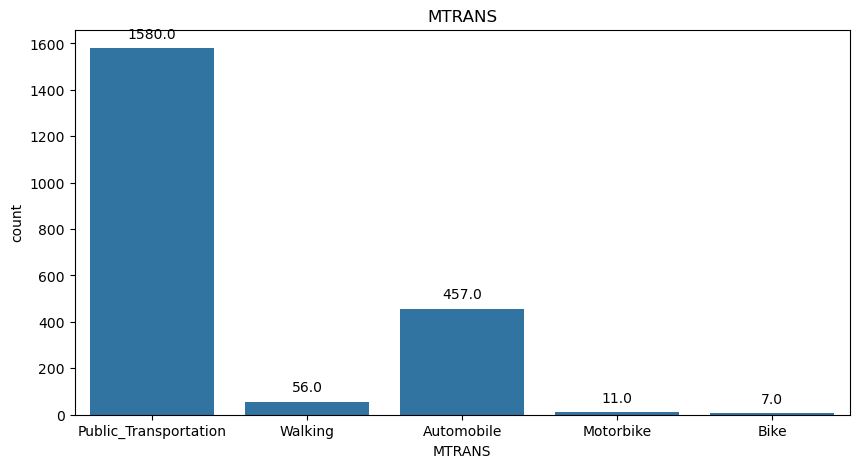

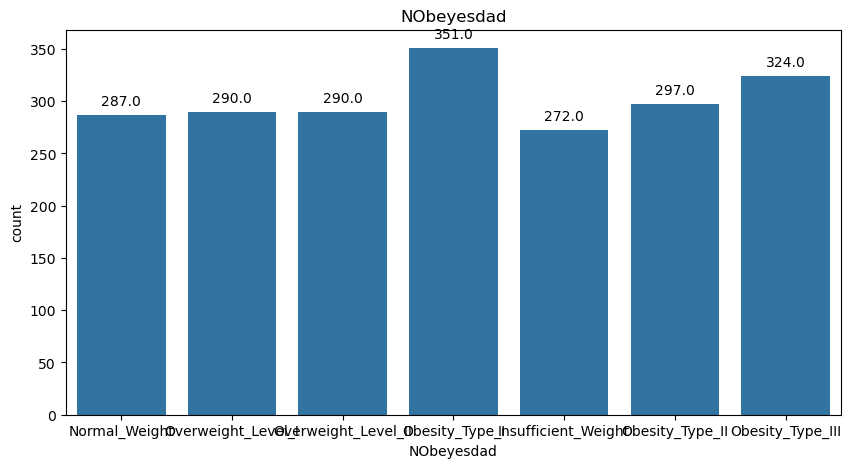

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

for feature in categorical_features:
    plt.figure(figsize=(10, 5))  # Устанавливаем размер графика
    ax = sns.countplot(data=dataset, x=feature)  # Столбчатая диаграмма

    # Добавляем аннотации (количество записей) над каждым столбцом
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    plt.title(f'{feature}')
    plt.show()

In [44]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
dataset['Gender'] = encoder.fit_transform(dataset[['Gender']])
dataset['family_history_with_overweight'] = encoder.fit_transform(dataset[['family_history_with_overweight']])
dataset['FAVC'] = encoder.fit_transform(dataset[['FAVC']])
dataset['SMOKE'] = encoder.fit_transform(dataset[['SMOKE']])
dataset['SCC'] = encoder.fit_transform(dataset[['SCC']])
dataset['CAEC'] = encoder.fit_transform(dataset[['CAEC']])
dataset['CALC'] = encoder.fit_transform(dataset[['CALC']])
dataset['MTRANS'] = encoder.fit_transform(dataset[['MTRANS']])
dataset['NObeyesdad'] = encoder.fit_transform(dataset[['NObeyesdad']])

In [45]:
dataset

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0.0,21.000000,1.620000,64.000000,1.0,0.0,2.0,3.0,2.0,0.0,2.000000,0.0,0.000000,1.000000,3.0,3.0,1.0
1,0.0,21.000000,1.520000,56.000000,1.0,0.0,3.0,3.0,2.0,1.0,3.000000,1.0,3.000000,0.000000,2.0,3.0,1.0
2,1.0,23.000000,1.800000,77.000000,1.0,0.0,2.0,3.0,2.0,0.0,2.000000,0.0,2.000000,1.000000,1.0,3.0,1.0
3,1.0,27.000000,1.800000,87.000000,0.0,0.0,3.0,3.0,2.0,0.0,2.000000,0.0,2.000000,0.000000,1.0,4.0,5.0
4,1.0,22.000000,1.780000,89.800000,0.0,0.0,2.0,1.0,2.0,0.0,2.000000,0.0,0.000000,0.000000,2.0,3.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0.0,20.976842,1.710730,131.408528,1.0,1.0,3.0,3.0,2.0,0.0,1.728139,0.0,1.676269,0.906247,2.0,3.0,4.0
2107,0.0,21.982942,1.748584,133.742943,1.0,1.0,3.0,3.0,2.0,0.0,2.005130,0.0,1.341390,0.599270,2.0,3.0,4.0
2108,0.0,22.524036,1.752206,133.689352,1.0,1.0,3.0,3.0,2.0,0.0,2.054193,0.0,1.414209,0.646288,2.0,3.0,4.0
2109,0.0,24.361936,1.739450,133.346641,1.0,1.0,3.0,3.0,2.0,0.0,2.852339,0.0,1.139107,0.586035,2.0,3.0,4.0


In [46]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   float64
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   float64
 5   FAVC                            2111 non-null   float64
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   float64
 9   SMOKE                           2111 non-null   float64
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   float64
 12  FAF                             21

In [47]:
dataset.describe()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,0.505921,24.312600,1.701677,86.586058,0.817622,0.883941,2.419043,2.685628,1.859308,0.020843,2.008011,0.045476,1.010298,0.657866,2.268593,2.365230,3.015632
std,0.500083,6.345968,0.093305,26.191172,0.386247,0.320371,0.533927,0.778039,0.468543,0.142893,0.612953,0.208395,0.850592,0.608927,0.515498,1.261423,1.952090
min,0.000000,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.947192,1.630000,65.473343,1.000000,1.000000,2.000000,2.658738,2.000000,0.000000,1.584812,0.000000,0.124505,0.000000,2.000000,3.000000,1.000000
50%,1.000000,22.777890,1.700499,83.000000,1.000000,1.000000,2.385502,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,0.625350,2.000000,3.000000,3.000000
75%,1.000000,26.000000,1.768464,107.430682,1.000000,1.000000,3.000000,3.000000,2.000000,0.000000,2.477420,0.000000,1.666678,1.000000,3.000000,3.000000,5.000000
max,1.000000,61.000000,1.980000,173.000000,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000,3.000000,1.000000,3.000000,2.000000,3.000000,4.000000,6.000000


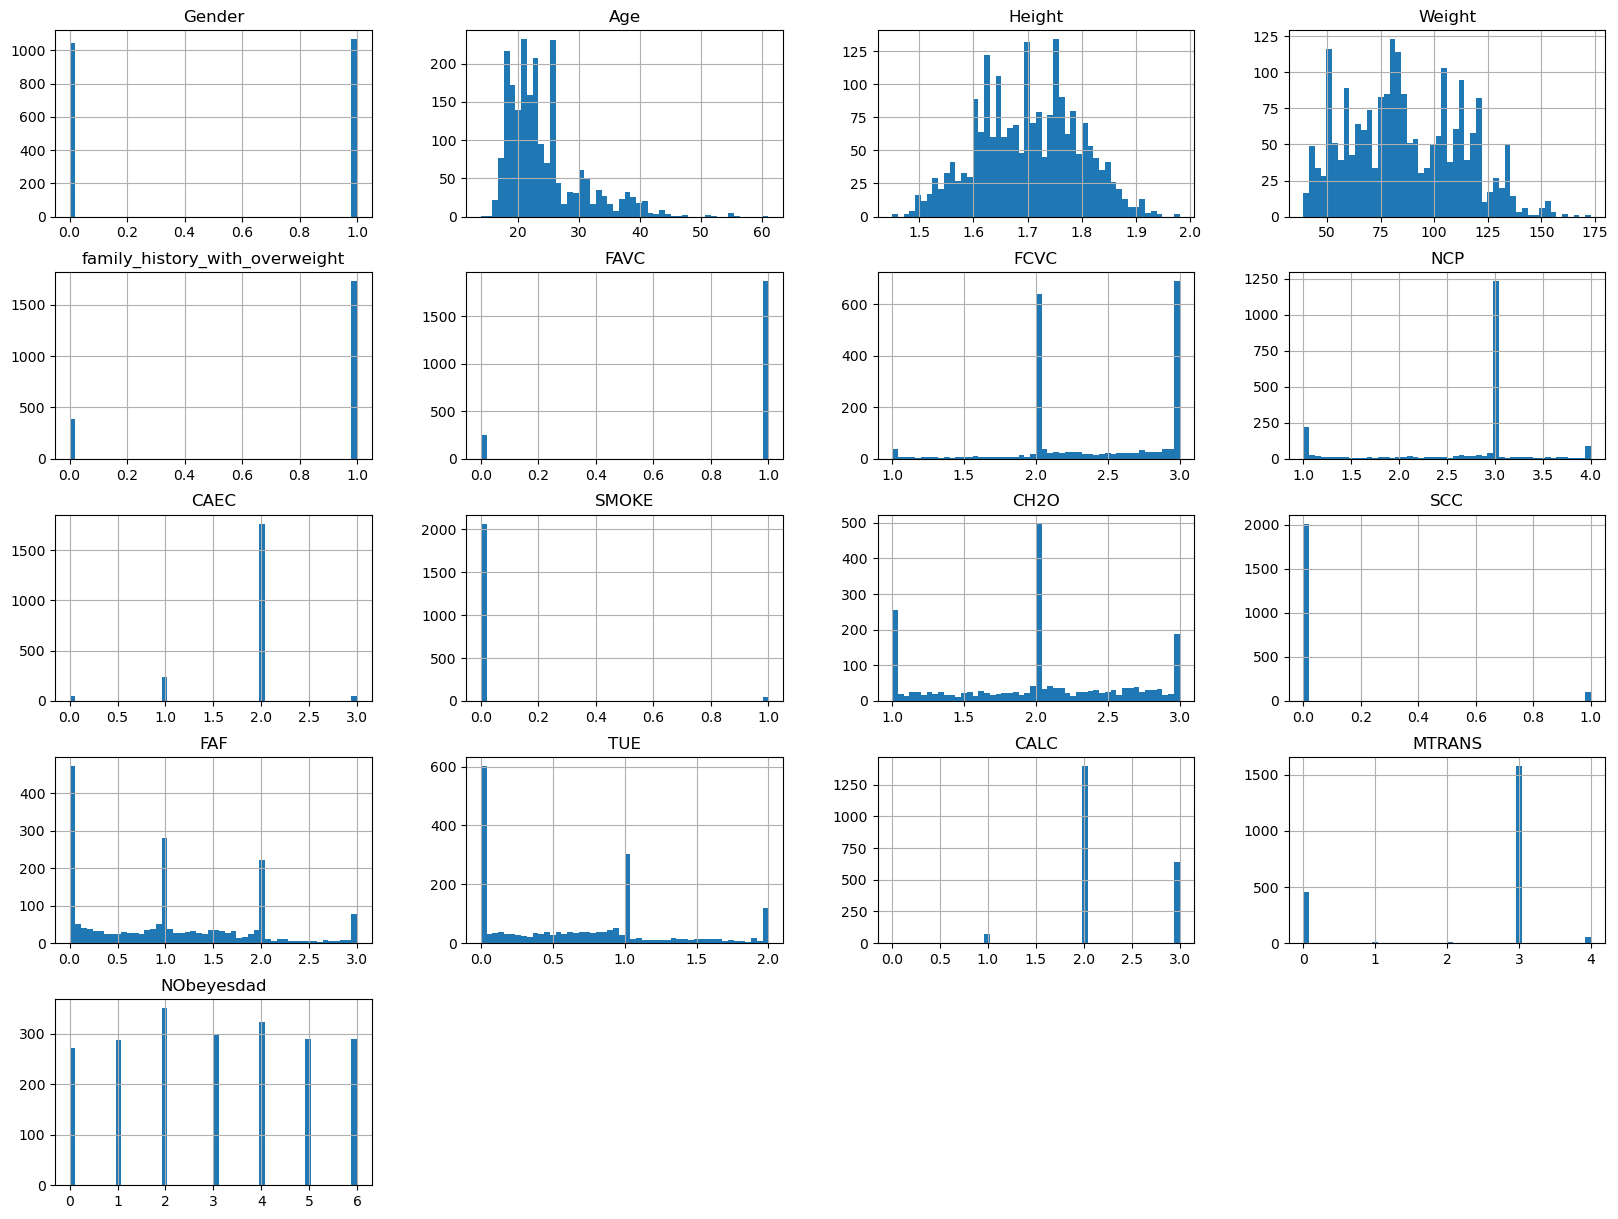

In [48]:
dataset.hist(bins=50,figsize=(20,15))
plt.show()

In [49]:
corr_matrix  = dataset.corr()
corr_matrix

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
Gender,1.000000,0.048394,0.618466,0.161668,0.102512,0.064934,-0.274505,0.067600,0.091543,0.044698,0.107930,-0.102633,0.189607,0.017269,0.007616,-0.137537,0.024908
Age,0.048394,1.000000,-0.025958,0.202560,0.205725,0.063902,0.016291,-0.043944,0.083739,0.091987,-0.045304,-0.116283,-0.144938,-0.296931,-0.044487,-0.601945,0.236170
Height,0.618466,-0.025958,1.000000,0.463136,0.247684,0.178364,-0.038121,0.243672,0.048818,0.055499,0.213376,-0.133753,0.294709,0.051912,-0.129732,-0.073609,0.038986
Weight,0.161668,0.202560,0.463136,1.000000,0.496820,0.272300,0.216125,0.107469,0.287493,0.025746,0.200575,-0.201906,-0.051436,-0.071561,-0.206677,0.004610,0.387643
family_history_with_overweight,0.102512,0.205725,0.247684,0.496820,1.000000,0.208036,0.040372,0.071370,0.169787,0.017385,0.147437,-0.185422,-0.056673,0.022943,0.036676,-0.101540,0.313667
FAVC,0.064934,0.063902,0.178364,0.272300,0.208036,1.000000,-0.027283,-0.007000,0.150068,-0.050660,0.009719,-0.190658,-0.107995,0.068417,-0.089520,-0.069800,0.044582
FCVC,-0.274505,0.016291,-0.038121,0.216125,0.040372,-0.027283,1.000000,0.042216,-0.054670,0.014320,0.068461,0.071852,0.019939,-0.101135,-0.060781,0.064743,0.018522
NCP,0.067600,-0.043944,0.243672,0.107469,0.071370,-0.007000,0.042216,1.000000,-0.097801,0.007811,0.057088,-0.015624,0.129504,0.036326,-0.071747,-0.053858,-0.092616
CAEC,0.091543,0.083739,0.048818,0.287493,0.169787,0.150068,-0.054670,-0.097801,1.000000,-0.055282,0.144995,-0.109179,-0.030110,-0.048567,-0.047540,-0.048535,0.327295
SMOKE,0.044698,0.091987,0.055499,0.025746,0.017385,-0.050660,0.014320,0.007811,-0.055282,1.000000,-0.031995,0.047731,0.011216,0.017613,-0.082471,-0.010702,-0.023256
